<a href="https://colab.research.google.com/github/lekshmimurali1224/assignments_data_science/blob/main/EDA_CaseStudy_Nv30_LiveCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the data
from google.colab import files
uploaded = files.upload()

Saving merc.csv to merc.csv


In [4]:
df = pd.read_csv('merc.csv')
df.head()

,ID,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID
0,14568,76,2005,5200,63000,325,32.099998,1.8,1,5
1,14569,69,2017,34948,27000,20,61.400002,2.1,1,3
2,14570,75,2016,49948,6200,555,28.000000,5.5,1,5
3,14571,32,2016,61948,16000,325,30.400000,4.0,1,5
4,14572,32,2016,73948,4000,325,30.100000,4.0,1,5


# **Step 1 : General informaton about the dataset (Data Type missing values)**

In [5]:
#Getting general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               13119 non-null  int64  
 1   model_ID         13119 non-null  int64  
 2   year             13119 non-null  int64  
 3   price            13119 non-null  int64  
 4   mileage          13119 non-null  int64  
 5   tax              13119 non-null  int64  
 6   mpg              13119 non-null  float64
 7   engineSize       13119 non-null  float64
 8   transmission_ID  13119 non-null  int64  
 9   fuel_ID          13119 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.0 MB


# **Step 2 : Getting the statistical properties about the data**

In [6]:
df.describe()

,ID,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,21127.000000,29.306045,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530,2.676347,2.171964
std,3787.273426,14.862361,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426,1.413722,1.805618
min,14568.000000,2.000000,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000,1.000000,1.000000
25%,17847.500000,25.000000,2016.000000,17450.000000,6097.500000,125.000000,45.599998,1.800000,1.000000,1.000000
50%,21127.000000,25.000000,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000,4.000000,1.000000
75%,24406.500000,35.000000,2019.000000,28980.000000,31779.500000,145.000000,64.199997,2.100000,4.000000,5.000000
max,27686.000000,91.000000,2020.000000,159999.000000,259000.000000,580.000000,217.300003,6.200000,4.000000,5.000000


# **Step 3 : getting an idea about NULL Values.**

In [7]:
df.isnull().sum().any()

False

**False means no NULL values are present.**

# **Step 4 : Getting an idea about duplicates**

In [9]:
df.duplicated().any()

False

In [10]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13114,False
13115,False
13116,False
13117,False


In [11]:
df.duplicated().sum()

0

**0 means there are no duplicated values in the uploaded data.**

# **Step 5 : Getting the no:of unique values**

In [14]:
#Gets the cardinality of the data
df.nunique() #nunique gives the number

,0
ID,13119
model_ID,27
year,25
price,4424
mileage,9716
tax,40
mpg,120
engineSize,26
transmission_ID,4
fuel_ID,4


# **Step 6 : Getting the unique values**

In [16]:
df['model_ID'].unique() #unique gives the data.

array([76, 69, 75, 32, 38, 35, 13, 24, 37, 25, 31, 34, 30, 28, 27, 82, 51,
       26, 39, 36, 91,  2, 29, 62,  6,  5,  4])

# **Step 7 : Average price per year**

In [17]:
df.groupby('year')['price'].mean() #Used to Group the data by function

,price
year,
1970,24999.000000
1997,9995.000000
1998,8605.000000
1999,5995.000000
2000,5743.333333
2001,4957.900000
2002,5820.444444
2003,4878.000000
2004,4727.615385


# **Step 8 : Matrix for correlation**

In [18]:
df.corr()

,ID,model_ID,year,price,mileage,tax,mpg,engineSize,transmission_ID,fuel_ID
ID,1.000000,-0.039794,-0.143420,-0.106641,0.174815,-0.029877,0.053173,0.000760,-0.427658,0.000329
model_ID,-0.039794,1.000000,-0.073541,0.277076,-0.005385,0.282952,-0.253426,0.398572,-0.057322,-0.093328
year,-0.143420,-0.073541,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147,0.229631,0.132624
price,-0.106641,0.277076,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126,0.141017,0.188533
mileage,0.174815,-0.005385,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652,-0.223316,-0.211988
tax,-0.029877,0.282952,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341,0.005091,0.256920
mpg,0.053173,-0.253426,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862,-0.023386,-0.458691
engineSize,0.000760,0.398572,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000,-0.027505,-0.046965
transmission_ID,-0.427658,-0.057322,0.229631,0.141017,-0.223316,0.005091,-0.023386,-0.027505,1.000000,0.031362
fuel_ID,0.000329,-0.093328,0.132624,0.188533,-0.211988,0.256920,-0.458691,-0.046965,0.031362,1.000000


# **Heatmap**

<Axes: >

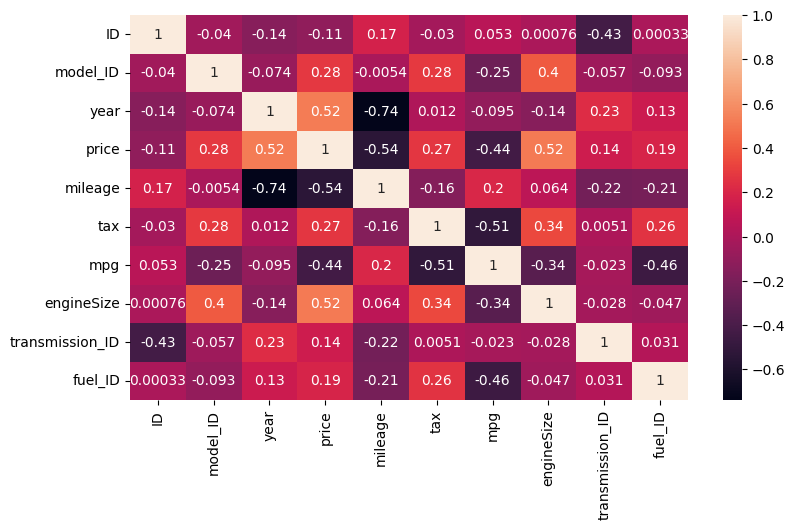

In [19]:
plt.figure(figsize=(9,5)) #Setting the fig size in inches
sns.heatmap(df.corr(),annot=True) #annot : the data in the columns

# **Step 9 : Getting the proportion of values**

In [20]:
df['fuel_ID'].value_counts()

,count
fuel_ID,
1,9187
5,3752
3,173
4,7


**Majority of the vehicls are with fuel_id 1 & 5.**

# **Step 10 : Data visualization**

**Histogram for car prices**

<Axes: xlabel='price', ylabel='Count'>

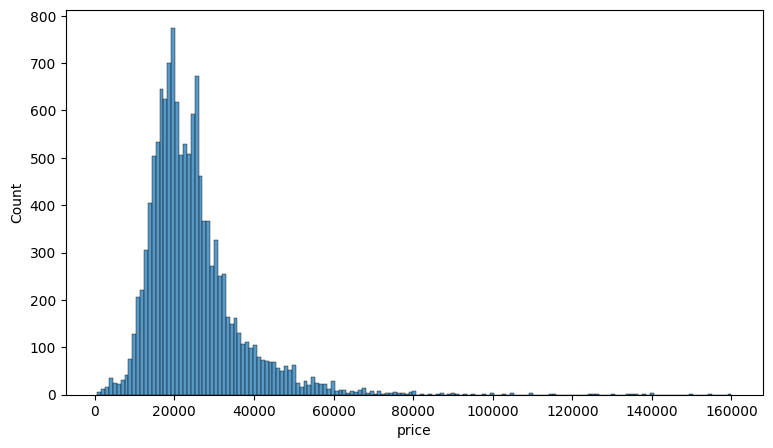

In [24]:
plt.figure(figsize=(9,5))
sns.histplot(df['price'])

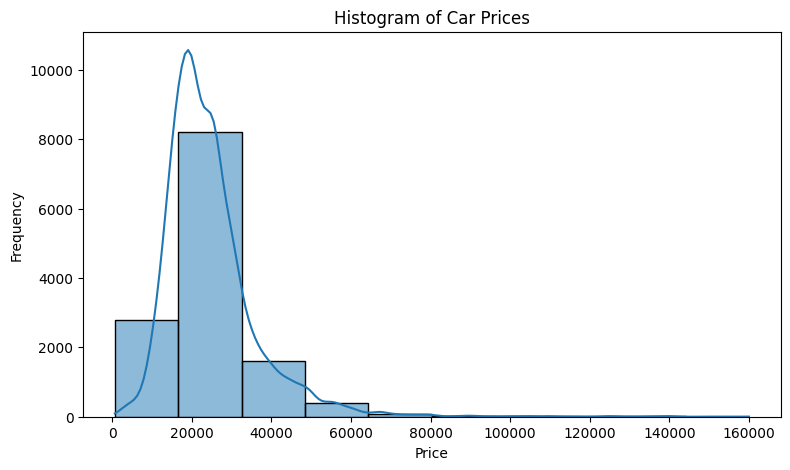

In [26]:
plt.figure(figsize=(9,5))
sns.histplot(df['price'], bins = 10, kde = True) #kde = Kernel Density Estimation. Line gets disappeared.
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Histogram for car milage.**

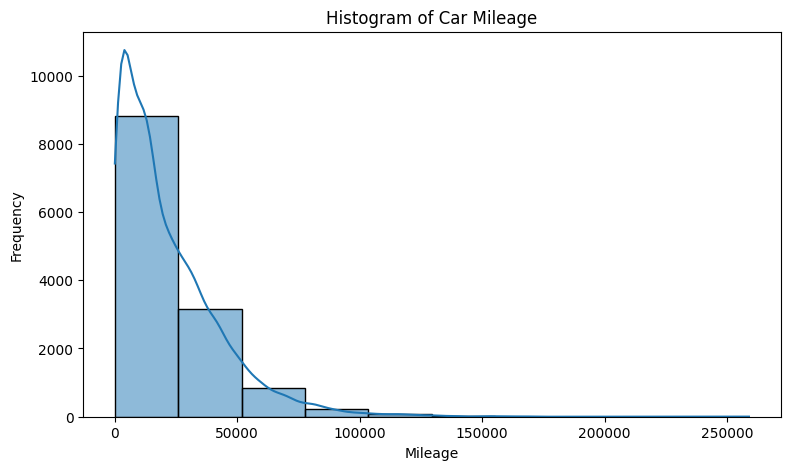

In [27]:
plt.figure(figsize=(9,5))
sns.histplot(df['mileage'], bins = 10, kde = True)
plt.title('Histogram of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()